In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
porosity = float(input("Enter Porosity"))
K = float(input("Enter Perm.(md)"))
h = float(input("Enter pay zone thicknes(Feet)"))
P = float(input("Enter  Reservoir Pressure(psi)"))
Pb = float(input("Enter Bubble Point Pressure(psi)"))
Bo = float(input("Enter Formation Volume Factor"))
Viscosity  = float(input("Enter fluid viscosity(cp)"))
ct = float(input("Enter Total Compressibility(psi-1)"))
A = float(input("Enter Drainage Area(Acres)"))
re = np.sqrt(43560*A/3.14)
rw = float(input("Enter Wellbore radius(ft)"))
S = float(input("Enter Skin Factor"))

Enter Porosity0.19
Enter Perm.(md)8.2
Enter pay zone thicknes(Feet)53
Enter  Reservoir Pressure(psi)5651
Enter Bubble Point Pressure(psi)5651
Enter Formation Volume Factor1.1
Enter fluid viscosity(cp)1.7
Enter Total Compressibility(psi-1)0.0000129
Enter Drainage Area(Acres)640
Enter Wellbore radius(ft)0.328
Enter Skin Factor0


In [3]:
J = K*h/(141.2*Bo*Viscosity*(np.log(re/rw)-0.75+S))
print("The value of productivity index is", J)


The value of productivity index is 0.19678102247296522


In [5]:
qmax = J*P/1.8
print("The value of Qmax is ", qmax, "stb/day")

The value of Qmax is  617.783087774848 stb/day


In [34]:
a = np.arange(0,5500,500)
b = np.append(a,5651)
pwf = b[-1::-1]
pwf

array([5651, 5000, 4500, 4000, 3500, 3000, 2500, 2000, 1500, 1000,  500,
          0])

In [39]:
flowrate = []
for i in pwf:
    q = qmax*(1-0.2*(i/P)-0.8*((i/P)**2))
    flowrate.append(q)
flowrates = np.array(flowrate)
flowrates

array([  0.        , 121.54544965, 205.99154977, 282.69935293,
       351.66885914, 412.90006839, 466.39298068, 512.14759601,
       550.16391439, 580.44193581, 602.98166027, 617.78308777])

In [44]:
df = pd.DataFrame(flowrates,pwf)
df

,0
5651,0.000000
5000,121.545450
4500,205.991550
4000,282.699353
3500,351.668859
3000,412.900068
2500,466.392981
2000,512.147596
1500,550.163914
1000,580.441936


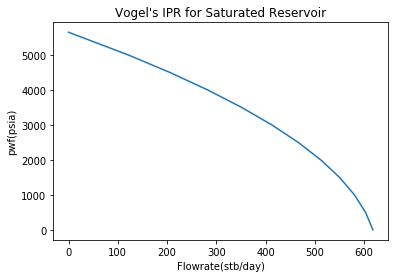

In [46]:
plt.figure()
plt.plot(flowrates,pwf)
plt.xlabel("Flowrate(stb/day)")
plt.ylabel("pwf(psia)")
plt.title("Vogel's IPR for Saturated Reservoir")
plt.show()

In [ ]:
##Jaiyesh Chahar